In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [37]:
df=pd.read_csv("train.csv")
df.head(5)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume,air_pollution_index
0,02/10/2012 09:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,5545,121
1,02/10/2012 10:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,4516,178
2,02/10/2012 11:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,4767,113
3,02/10/2012 12:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,5026,20
4,02/10/2012 13:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,4918,281


In [29]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33750 entries, 0 to 33749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  int32  
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  int32  
 12  traffic_volume       33750 non-null  int64  
 13  air_pollution_index  33750 non-null  int64  
dtypes: float64(3), int32(2), int64(8), object(1)
memory usage: 3.6+ MB


(33750, 14)

In [5]:
df.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,air_pollution_index
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163,154.841422
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289,83.735515
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000,83.000000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000,155.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000,228.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000,299.000000


In [36]:
df.isna().sum()

date_time              0
is_holiday             0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
traffic_volume         0
air_pollution_index    0
dtype: int64

In [39]:
df = df.dropna()
df.duplicated().sum()

0

In [40]:
columns = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
columns

array(['humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles',
       'dew_point', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all',
       'traffic_volume'], dtype=object)

In [12]:
le = LabelEncoder()

In [13]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

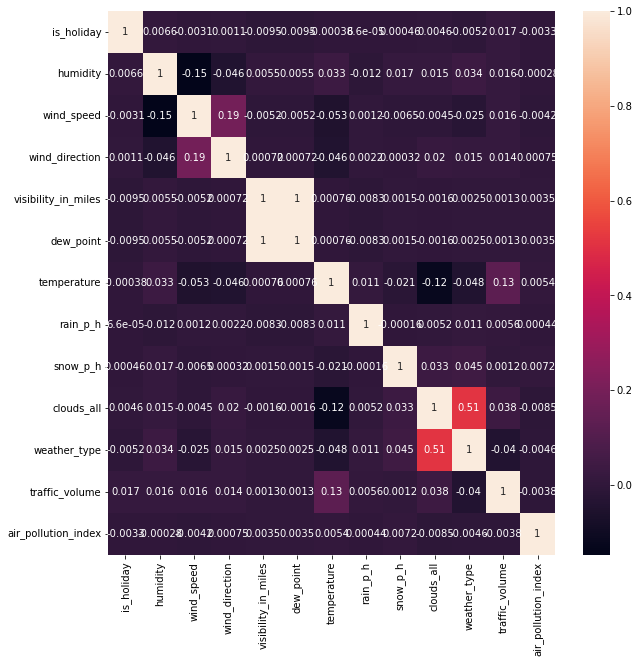

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [43]:
df.head(5)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume,air_pollution_index
0,02/10/2012 09:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,5545,121
1,02/10/2012 10:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,4516,178
2,02/10/2012 11:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,4767,113
3,02/10/2012 12:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,5026,20
4,02/10/2012 13:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,4918,281


In [16]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [17]:
y.value_counts()

259    141
11     141
27     140
91     139
222    138
      ... 
238     95
219     94
261     88
40      85
205     72
Name: air_pollution_index, Length: 290, dtype: int64

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
sc = StandardScaler()
X_train[columns] = sc.fit_transform(X_train[columns])
X_test[columns] = sc.fit_transform(X_test[columns])

In [42]:
X_test

,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
10802,7,0.231539,-1.152289,1.013651,-1.558625,-1.558625,-1.130342,-0.147614,-0.036198,0.336219,8,-0.236194
4407,7,-0.477067,0.305075,0.893140,1.575923,1.575923,-1.175290,-0.147614,-0.036198,-1.284672,0,0.783083
7745,7,-0.713268,0.305075,0.039523,-1.558625,-1.558625,1.699224,-0.147614,-0.036198,-1.001659,1,-0.010192
12064,7,-0.240865,-0.180713,1.194417,0.008649,0.008649,-1.844439,-0.147614,-0.036198,-1.284672,0,-1.451273
22623,7,-0.890420,0.305075,-0.080988,1.184105,1.184105,0.403699,-0.147614,-0.036198,1.005158,5,-0.944906
...,...,...,...,...,...,...,...,...,...,...,...,...
2912,7,0.881094,0.790863,1.294843,-1.558625,-1.558625,-1.688570,-0.147614,-0.036198,-1.284672,0,-1.528285
26642,7,0.172489,0.305075,1.093992,0.008649,0.008649,0.752410,1.513431,-0.036198,0.619232,10,-0.119921
20001,7,-0.536117,-0.180713,-0.372222,1.184105,1.184105,-0.422044,-0.147614,-0.036198,1.005158,8,1.248678
2393,7,0.881094,-1.638077,-2.019201,-0.383169,-0.383169,-1.911862,-0.147614,-0.036198,-0.795832,1,0.245005


In [45]:
#  Linear Regression model and fit it
lr =LinearRegression()
model = lr.fit(X_train,y_train)

In [46]:
#data prediction
y_predict=model.predict(X_test)
y_predict

array([144.35324145, 145.05638915, 146.14159291, ..., 143.49343983,
       144.1600447 , 145.2669681 ])

In [47]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

-6828.119360928492

In [48]:
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

-102.32623823702886

In [49]:
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

-4.993019123133591